## Climate Analysis of Hong Kong - Data Science Project

This project aims to conduct a detailed analysis of Hong Kong's climate data, including rainfall, humidity, and temperatures (maximum, minimum, and average). Additionally, a global warming trend analysis will be performed using historical temperature data. The project utilizes Python and libraries such as Pandas, Matplotlib, and Seaborn for data analysis and visualization.

Project Objectives
---
🔹 Analyze rainfall patterns in Hong Kong over the years and identify seasonal trends.
🔹 Study relative humidity over time and its relationship with other climatic variables.
🔹 Examine temperature variations (maximum, minimum, and average) in Hong Kong, identifying seasonal patterns and trends.
🔹 Assess global warming trends by analyzing Hong Kong’s average temperatures and determining the warming rate over the years.

Project Steps
Data Import
✅ Load the dataset and perform initial checks.
✅ Load the DataFrame.
✅ Inspect missing data.
✅ Convert the 'date' column to datetime format.
✅ Drop previous columns for year, month, and weekday.
✅ Correct column titles.
✅ Add seasonal classifications.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import pandas as pd
#Carregamento do dataset
df = pd.read_excel(r"D:\Downloads\HK_Weather_2010_2019.xlsx")

#Exibir as primeiras linhas do dataframe
print(df.head())

        date  year  month  day  WeekDay  Pressure  max temparature  \
0 2018-05-10  2018      5   10        7    1015.0             23.9   
1 2017-08-04  2017      8    4        7    1003.0             29.3   
2 2015-01-24  2015      1   24        7    1019.1             18.5   
3 2010-04-20  2010      4   20        7    1010.4             25.6   
4 2015-10-05  2015     10    5        7    1015.2             27.8   

   temparature  mintemp  dewpoint  humidity  cloud  rainfall  sunshine  \
0         23.0     22.0      21.1        89     90      0.80         4   
1         27.6     25.9      25.5        89     79      1.93        14   
2         17.0     15.8      12.7        76     85      0.90        15   
3         23.3     21.7      22.3        94     84      1.10         5   
4         26.7     25.4      25.4        93     88      1.56         9   

   evaporation  windspeed  
0            1       51.6  
1            1       49.2  
2            1       49.2  
3            1       4

In [47]:
#Verificacao de valores nulos/ausentes
print(df.isnull().sum())

#Remocao de linhas ou colunas com valores ausentes
df = df.dropna()

#Remocao de espacos extras nos nomes das colunas
df.columns = df.columns.str.strip()

date               0
year               0
month              0
day                0
WeekDay            0
Pressure           0
max temparature    0
temparature        0
mintemp            0
dewpoint           0
humidity           0
cloud              0
rainfall           0
sunshine           0
evaporation        0
windspeed          0
dtype: int64


In [48]:
# Ajustar o formato da data para 'dd/mm/aaaa'
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Verificar se a conversão foi bem-sucedida
print(df['date'].head())

0   2018-05-10
1   2017-08-04
2   2015-01-24
3   2010-04-20
4   2015-10-05
Name: date, dtype: datetime64[ns]


In [49]:
# Renomear as colunas para garantir que o código funcione corretamente
df = df.rename(columns={'Year': 'year', 'Month': 'month', 'Day': 'day', 'WeekDay': 'weekday', 'temparature':'temperature','max temparature':'maxtemp'})

# Verifique as colunas novamente
print(df.columns)

Index(['date', 'year', 'month', 'day', 'weekday', 'Pressure', 'maxtemp',
       'temperature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'rainfall',
       'sunshine', 'evaporation', 'windspeed'],
      dtype='object')


In [50]:
#Criacao das colunas dia,dia da semana, mes e ano derivadas da coluna data convertida para datetime
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.day_name()
# Verificar as primeiras linhas do DataFrame
print(df.head())

        date  year  month  day  weekday  Pressure  maxtemp  temperature  \
0 2018-05-10  2018      5   10        7    1015.0     23.9         23.0   
1 2017-08-04  2017      8    4        7    1003.0     29.3         27.6   
2 2015-01-24  2015      1   24        7    1019.1     18.5         17.0   
3 2010-04-20  2010      4   20        7    1010.4     25.6         23.3   
4 2015-10-05  2015     10    5        7    1015.2     27.8         26.7   

   mintemp  dewpoint  humidity  cloud  rainfall  sunshine  evaporation  \
0     22.0      21.1        89     90      0.80         4            1   
1     25.9      25.5        89     79      1.93        14            1   
2     15.8      12.7        76     85      0.90        15            1   
3     21.7      22.3        94     84      1.10         5            1   
4     25.4      25.4        93     88      1.56         9            1   

   windspeed  Year  Month  Day   Weekday  
0       51.6  2018      5   10  Thursday  
1       49.2  2017

In [51]:
# Garantir que 'Year' e 'Month' são inteiros
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Agrupar por 'Year' e calcular a média da 'Rainfall'
df_yearly = df.groupby('Year').agg({'rainfall': 'mean'}).reset_index()

# Agrupar por 'Month' e calcular a média da 'Rainfall'
df_monthly = df.groupby('Month').agg({'rainfall': 'mean'}).reset_index()

# Visualizar os resultados
print(df_yearly.head())
print(df_monthly.head())

   Year  rainfall
0  2010  7.819521
1  2011  7.918495
2  2012  6.867333
3  2013  7.680431
4  2014  8.633689
   Month  rainfall
0      1  1.619286
1      2  1.545385
2      3  4.368478
3      4  7.134865
4      5  6.512231


In [52]:
#Criação do agrupamento "Seasons"
def get_season(month):
    if month in [3, 4, 5]:  # Primavera
        return 'Spring'
    elif month in [6, 7, 8]:  # Verão
        return 'Summer'
    elif month in [9, 10, 11]:  # Outono
        return 'Autumn'
    else:  # Inverno
        return 'Winter'

# Aplicar a função para criar a coluna 'Season'
df['Season'] = df['Month'].apply(get_season)

# Agrupar por 'Season' e calcular a média de 'Rainfall'
df_seasonal = df.groupby('Season').agg({'rainfall': 'mean'}).reset_index()

# Exibir os resultados
print(df_seasonal)

   Season   rainfall
0  Autumn   6.924360
1  Spring   6.302080
2  Summer  10.481405
3  Winter   1.422614


## Analysis and Visualization

📊 Annual Averages
✔ Annual Temperature and Rainfall Average
✔ Monthly Temperature and Rainfall Average
✔ Seasonal Temperature and Rainfall Average

🌧 Rainfall Analysis
✔ Annual Rainfall Average
✔ Rainfall Trends by Year and Month
✔ Average Rainfall by Season in Hong Kong (2010-2019)

💧 Humidity Analysis
✔ Annual Humidity Average
✔ Humidity Trends by Year and Month
✔ Average Humidity by Season in Hong Kong (2010-2019)

📈 Trend Analysis
✔ Annual Trends for Temperature and Rainfall
✔ Monthly Trends for Temperature and Rainfall
✔ Maximum and Minimum Temperatures Over the Years



In [53]:
# Garantir que 'Year' e 'Month' são inteiros (se necessário)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

In [54]:
# Agrupar por 'Year' e calcular a média da 'Humidity'
df_yearly_humi=df.groupby('Year').agg({'humidity':'mean'}).reset_index()
# Agrupar por 'Month' e calcular a média da 'Humidity'
df_monthly_humi = df.groupby('Month').agg({'humidity':'mean'}).reset_index()
# Agrupar por 'Season' e calcular a média de 'humidity'
df_seasonal_humi = df.groupby('Season').agg({'humidity': 'mean'}).reset_index()
# Visualizar os resultados
print(df_yearly_humi.head())
print(df_monthly_humi.head())
print(df_seasonal_humi.head())

   Year   humidity
0  2010  84.604167
1  2011  82.075269
2  2012  84.433333
3  2013  85.362069
4  2014  82.398058
   Month   humidity
0      1  83.821429
1      2  84.820513
2      3  83.543478
3      4  87.256757
4      5  86.015385
   Season   humidity
0  Autumn  81.996000
1  Spring  85.928000
2  Summer  83.724280
3  Winter  82.465909


In [55]:
# Agrupar por 'Year' e calcular a média da 'Humidity'
df_yearly_rain=df.groupby('Year').agg({'rainfall':'mean'}).reset_index()
# Agrupar por 'Month' e calcular a média da 'Humidity'
df_monthly_rain = df.groupby('Month').agg({'rainfall':'mean'}).reset_index()
# Agrupar por 'Season' e calcular a média de 'humidity'
df_seasonal_rain = df.groupby('Season').agg({'rainfall': 'mean'}).reset_index()
# Visualizar os resultados
print(df_yearly_rain.head())
print(df_monthly_rain.head())
print(df_seasonal_rain.head())

   Year  rainfall
0  2010  7.819521
1  2011  7.918495
2  2012  6.867333
3  2013  7.680431
4  2014  8.633689
   Month  rainfall
0      1  1.619286
1      2  1.545385
2      3  4.368478
3      4  7.134865
4      5  6.512231
   Season   rainfall
0  Autumn   6.924360
1  Spring   6.302080
2  Summer  10.481405
3  Winter   1.422614


In [56]:
# Agrupar por ano e calcular as temperaturas máximas e mínimas
df_yearly_temperature = df.groupby('Year').agg({'temperature':'mean'})
df_monthly_temperature = df.groupby('Month').agg({'temperature':'mean'})

# Exibir os resultados
df_yearly_temperature.head()
df_monthly_temperature.head()

,temperature
Month,
1,16.825000
2,18.097436
3,19.595652
4,23.256757
5,26.264615


In [57]:
# Agrupar por ano e calcular as temperaturas máximas e mínimas
df_yearly_temperature = df.groupby('Year').agg({'temperature':'mean'})
df_yearly_temp = df.groupby('Year').agg({'maxtemp': 'max', 'mintemp': 'min'}).reset_index()
df_monthly_temp = df.groupby('Month').agg({'maxtemp': 'max', 'mintemp': 'min'}).reset_index()
# Exibir os resultados
df_monthly_temperature.head()
df_yearly_temp.head()
df_monthly_temp.head()

,Month,maxtemp,mintemp
0,1,23.4,10.7
1,2,26.3,10.6
2,3,27.6,11.6
3,4,31.5,15.5
4,5,34.7,16.6


In [58]:
# Exibir as primeiras linhas dos dados agregados

print("Annual Rainfall Average:")
print(df_yearly_rain.head())


print("\nMonthly Rainfall Average:")
print(df_monthly_rain.head())


print("\nMSeasonal Rainfall Average:")
print(df_seasonal_rain)

print("Annual Humidity Average:")
print(df_yearly_humi.head())


print("\nMonthly Temperature and Rainfall Average:")
print(df_monthly_humi.head())


print("\nMSeasonal Humidity:")
print(df_seasonal_humi)

Annual Rainfall Average:
   Year  rainfall
0  2010  7.819521
1  2011  7.918495
2  2012  6.867333
3  2013  7.680431
4  2014  8.633689

Monthly Rainfall Average:
   Month  rainfall
0      1  1.619286
1      2  1.545385
2      3  4.368478
3      4  7.134865
4      5  6.512231

MSeasonal Rainfall Average:
   Season   rainfall
0  Autumn   6.924360
1  Spring   6.302080
2  Summer  10.481405
3  Winter   1.422614
Annual Humidity Average:
   Year   humidity
0  2010  84.604167
1  2011  82.075269
2  2012  84.433333
3  2013  85.362069
4  2014  82.398058

Monthly Temperature and Rainfall Average:
   Month   humidity
0      1  83.821429
1      2  84.820513
2      3  83.543478
3      4  87.256757
4      5  86.015385

MSeasonal Humidity:
   Season   humidity
0  Autumn  81.996000
1  Spring  85.928000
2  Summer  83.724280
3  Winter  82.465909


Visualizations

Rainfall: Annual, Monthly, and Seasonal Averages

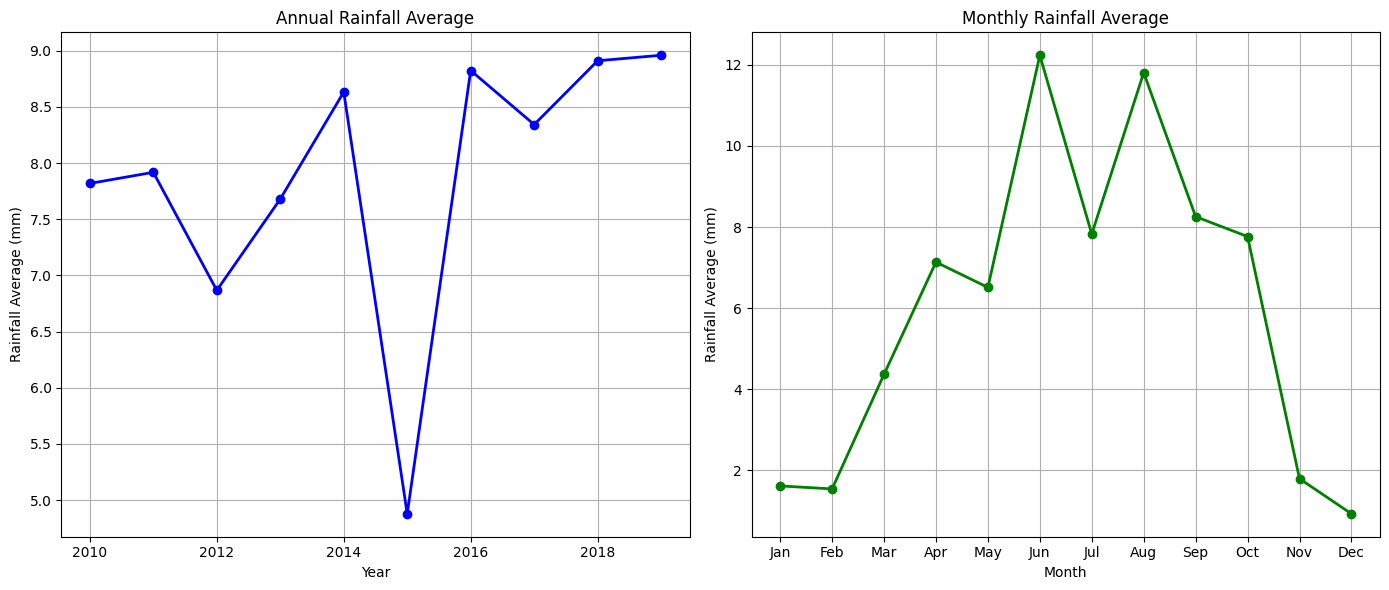

In [59]:
#Médias aanual e mensal da precipitação
df_yearly_rain = df.groupby('Year').agg({'temperature': 'mean', 'rainfall': 'mean'}).reset_index()
df_monthly_rain = df.groupby('Month').agg({'temperature': 'mean', 'rainfall': 'mean'}).reset_index()

# Criar subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de média anual
ax1.plot(df_yearly_rain['Year'], df_yearly_rain['rainfall'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
ax1.set_title('Annual Rainfall Average')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall Average (mm)')
ax1.grid(True)

# Gráfico de média mensal
ax2.plot(df_monthly_rain['Month'], df_monthly_rain['rainfall'], marker='o', color='g', linestyle='-', linewidth=2, markersize=6)
ax2.set_title('Monthly Rainfall Average')
ax2.set_xlabel('Month')
ax2.set_ylabel('Rainfall Average (mm)')
ax2.set_xticks(df_monthly['Month'])
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.grid(True)

plt.tight_layout()
plt.show()

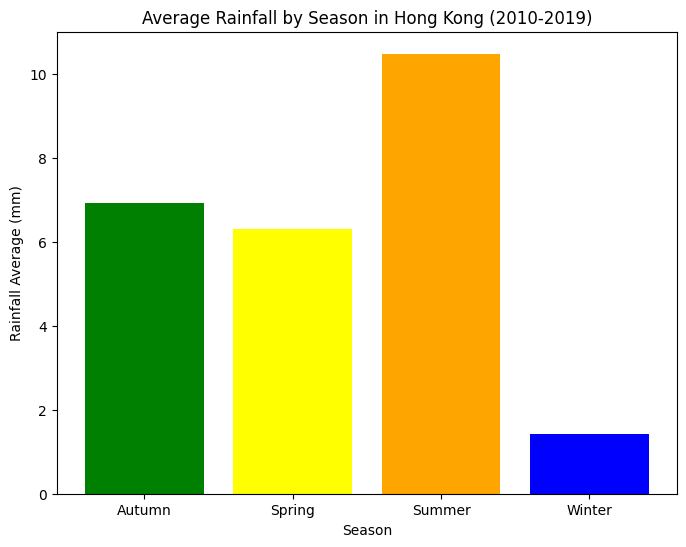

In [60]:
import matplotlib.pyplot as plt

df_seasonal_rain = df.groupby('Season').agg({'rainfall': 'mean'}).reset_index()

# Plotar a média de precipitação por estação
plt.figure(figsize=(8,6))
plt.bar(df_seasonal_rain['Season'], df_seasonal_rain['rainfall'], color=['green', 'yellow', 'orange', 'blue'])
plt.title('Average Rainfall by Season in Hong Kong (2010-2019)')
plt.xlabel('Season')
plt.ylabel('Rainfall Average (mm)')
plt.show()

Humidity: Annual, Monthly, and Seasonal Averages

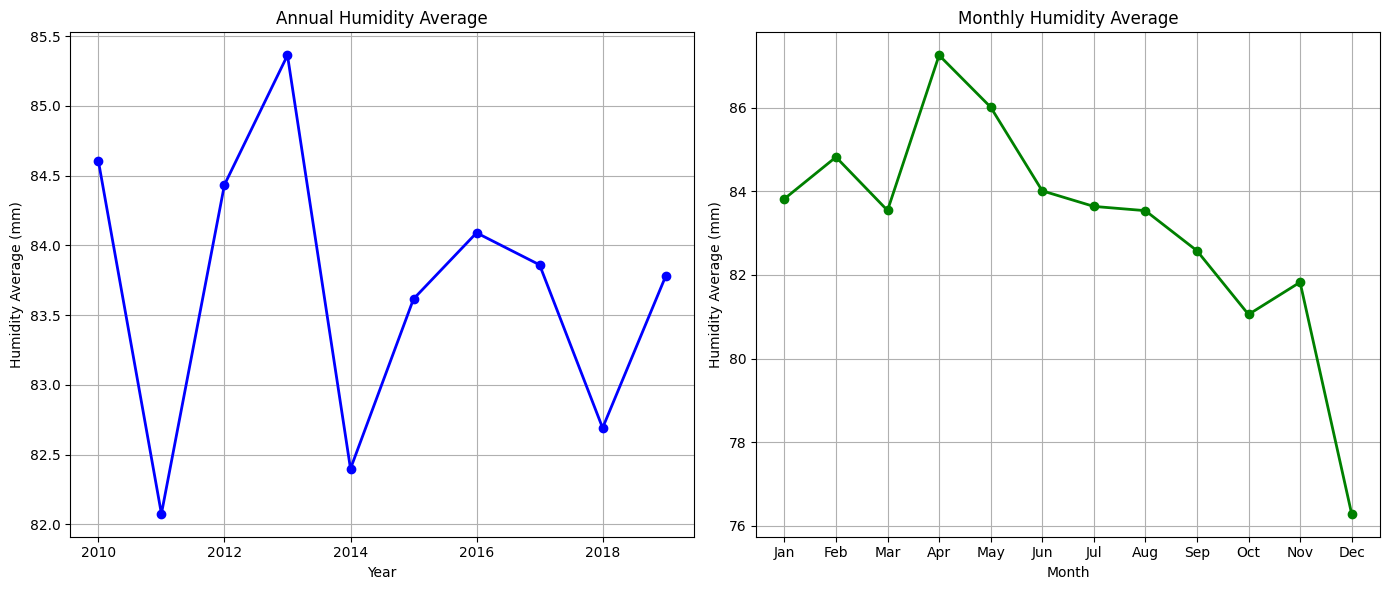

In [61]:
df_yearly_humi= df.groupby('Year').agg({'humidity':'mean'}).reset_index()
df_monthly_humi = df.groupby('Month').agg({'humidity':'mean'}).reset_index()

# Criar subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Gráfico de média anual
ax1.plot(df_yearly_humi['Year'], df_yearly_humi['humidity'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
ax1.set_title('Annual Humidity Average')
ax1.set_xlabel('Year')
ax1.set_ylabel('Humidity Average (mm)')
ax1.grid(True)


# Gráfico de média mensal
ax2.plot(df_monthly_humi['Month'], df_monthly_humi['humidity'], marker='o', color='g', linestyle='-', linewidth=2, markersize=6)
ax2.set_title('Monthly Humidity Average')
ax2.set_xlabel('Month')
ax2.set_ylabel('Humidity Average (mm)')
ax2.set_xticks(df_monthly['Month'])
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.grid(True)


plt.tight_layout()
plt.show()

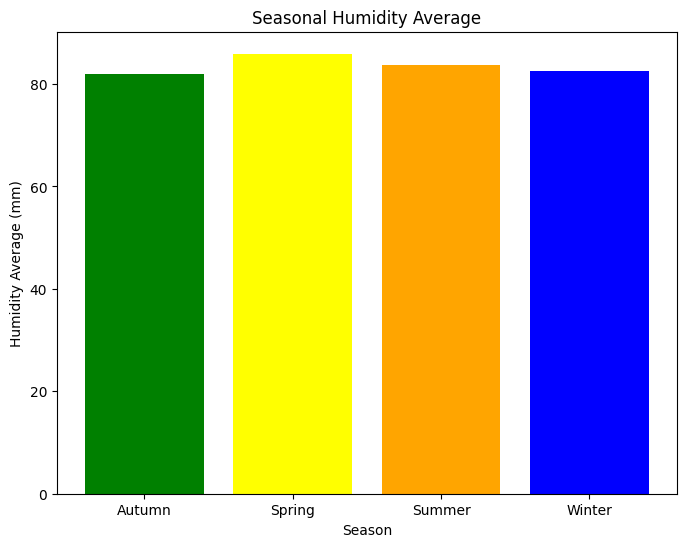

In [62]:
import matplotlib.pyplot as plt

df_seasonal_humi = df.groupby('Season').agg({'humidity': 'mean'}).reset_index()

# Plotar a média de Umidade por estação
plt.figure(figsize=(8,6))
plt.bar(df_seasonal_humi['Season'], df_seasonal_humi['humidity'], color=['green', 'yellow', 'orange', 'blue'])
plt.title('Seasonal Humidity Average')
plt.xlabel('Season')
plt.ylabel('Humidity Average (mm)')
plt.show()

Monthly and Annual Trend Graphs of Temperature and Precipitation

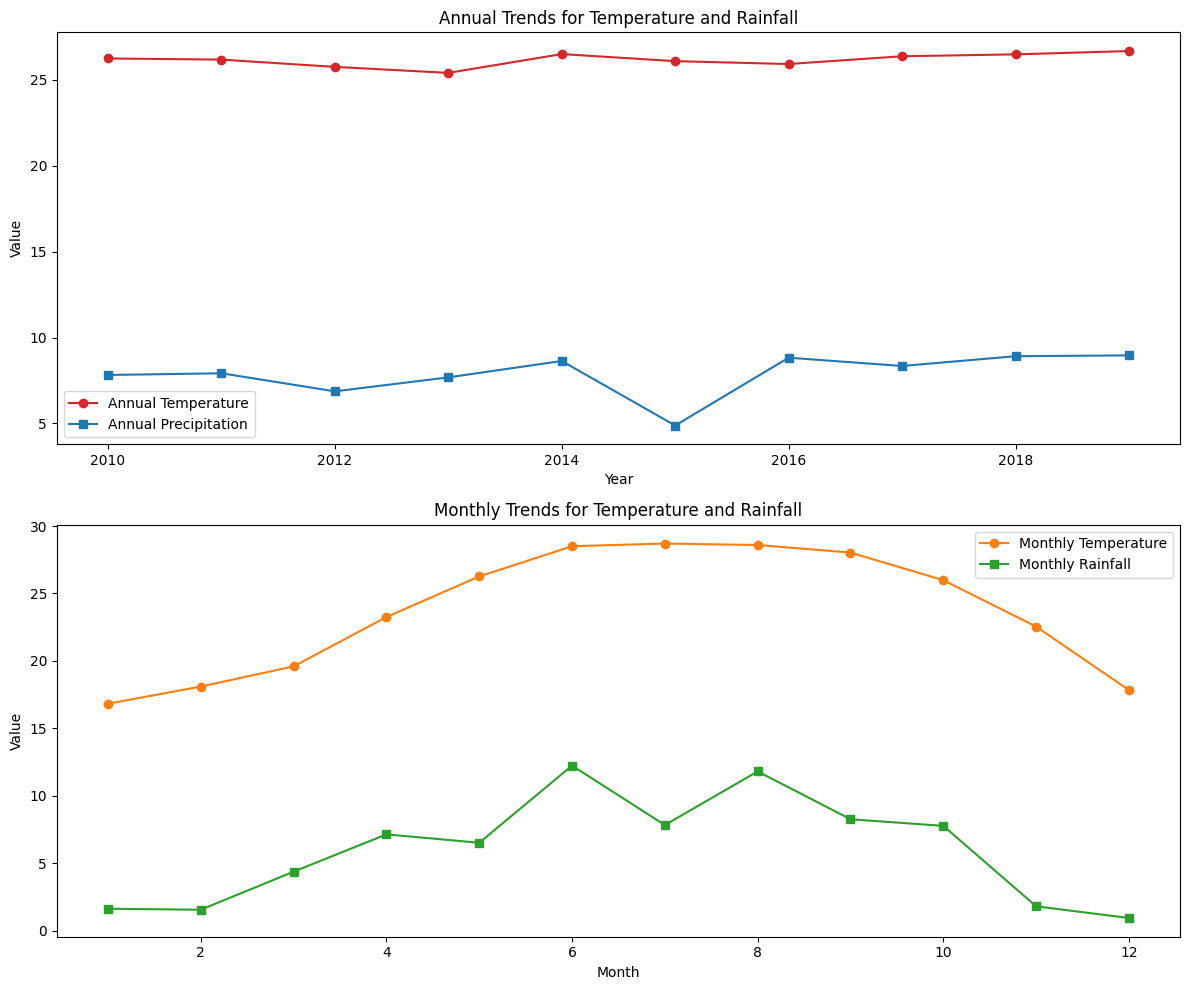

In [63]:
import matplotlib.pyplot as plt
# Criar os subgráficos
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

#  Gráfico 1: Tendência Anual de Temperatura e Precipitação
axs[0].plot(df_yearly['Year'], df_yearly_temperature['temperature'], label='Annual Temperature', color='tab:red', marker='o')
axs[0].plot(df_yearly['Year'], df_yearly_rain['rainfall'], label='Annual Precipitation', color='tab:blue', marker='s')
axs[0].set_title('Annual Trends for Temperature and Rainfall')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Value')
axs[0].legend()

#  Gráfico 2: Tendência Mensal de Temperatura e Precipitação
axs[1].plot(df_monthly['Month'], df_monthly_temperature['temperature'], label='Monthly Temperature', color='tab:orange', marker='o')
axs[1].plot(df_monthly['Month'], df_monthly_rain['rainfall'], label='Monthly Rainfall', color='tab:green', marker='s')
axs[1].set_title('Monthly Trends for Temperature and Rainfall')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Value')
axs[1].legend()

# Ajustar o layout
plt.tight_layout()
plt.show()

Temperatures Over the Years (Maximum and Minimum)

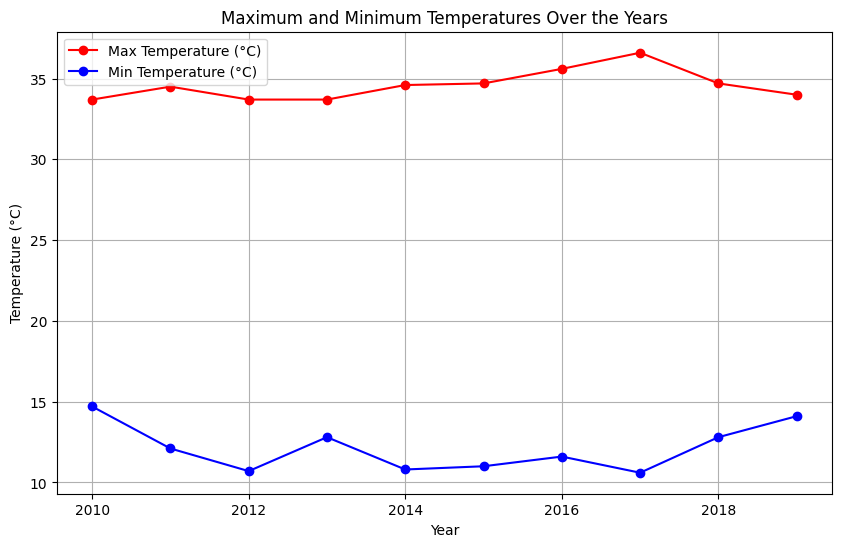

In [64]:
# Visualização das temperaturas máximas e mínimas ao longo dos anos
plt.figure(figsize=(10,6))

# Temperaturas máximas
plt.plot(df_yearly_temp['Year'], df_yearly_temp['maxtemp'], marker='o', linestyle='-', color='red', label='Max Temperature (°C)')

# Temperaturas mínimas
plt.plot(df_yearly_temp['Year'], df_yearly_temp['mintemp'], marker='o', linestyle='-', color='blue', label='Min Temperature (°C)')

# Adicionar título e rótulos
plt.title('Maximum and Minimum Temperatures Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.show()

Conclusions
Key Insights
The analysis of temperature, humidity, and rainfall data in Hong Kong revealed typical climate patterns of a tropical region, with relatively high humidity and precipitation levels during the colder seasons. However, an anomaly was observed in 2015, which had one of the lowest humidity averages in the dataset, resulting in the lowest average precipitation level. On the other hand, 2017 stood out for recording both the lowest and highest temperatures in the dataset, suggesting greater thermal variability during that period.

An intriguing finding was the clearer seasonal definition in Hong Kong compared to subtropical countries like Brazil. While humidity levels vary slightly throughout the year, precipitation follows a more distinct pattern: significantly increasing in summer, balancing in spring and autumn, and dropping to very low levels in winter. This pattern reinforces the correlation between warmer months and increased evaporation, leading to higher rainfall levels.

These findings not only contribute to a better understanding of Hong Kong's climate but can also be applied in broader studies on the impacts of climate variations in different regions worldwide.